# Notebook Outline: Comparing Resampling Techniques for Imbalanced Data

## Introduction

* **Objective of the notebook**: 
    * Compare the performance of different resampling techniques for imbalanced data


In [300]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

## Section 1: Creating an Imbalanced Dataset

In [301]:
# Creating imbalanced dataset
X, y = make_classification(
    n_classes=2, class_sep=1.5,
    weights=[0.1, 0.9],
    n_informative=3, n_redundant=0,
    flip_y=0, n_features=20,
    n_clusters_per_class=1, n_samples=1000, random_state=10
)

In [302]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Section 2: Defining Evaluation Function

In [303]:
def evaluate_classifier(desc, df, clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
    print("Recall:", recall_score(y_test, clf.predict(X_test)))
    print("Precision:", precision_score(y_test, clf.predict(X_test)))
    print("f1-score:", f1_score(y_test, clf.predict(X_test)))
    df.loc[len(df.index)] = [desc,
                             accuracy_score(y_test, clf.predict(X_test)),
                             recall_score(y_test, clf.predict(X_test)),
                             precision_score(y_test, clf.predict(X_test)),
                             f1_score(y_test, clf.predict(X_test))]

results = pd.DataFrame(columns=['Description', 'Accuracy', 'Recall', 'Precision', 'f1-score'])

## Section 3: Applying Resampling Techniques and Classifiers

## 3.0 No Resampling

In [304]:
# Logistic Regression
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
evaluate_classifier("Logistic", results, clf_lr, X_test, y_test)
results

Accuracy: 0.985
Recall: 0.9945054945054945
Precision: 0.9890710382513661
f1-score: 0.9917808219178081


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781


In [305]:
# KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
evaluate_classifier("KNN", results, clf_knn, X_test, y_test)
results

Accuracy: 0.975
Recall: 1.0
Precision: 0.9732620320855615
f1-score: 0.986449864498645


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450


### 3.1 Random Under-Sampling

In [306]:
# Code to perform random under-sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [307]:
# Logistic Regression
clf_lr = LogisticRegression()
clf_lr.fit(X_res, y_res)
evaluate_classifier("Logistic RUS", results, clf_lr, X_test, y_test)
results

Accuracy: 0.955
Recall: 0.9505494505494505
Precision: 1.0
f1-score: 0.9746478873239436


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648


In [308]:
# KNN Classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_res, y_res)
evaluate_classifier("KNN RUS", results, clf_lr, X_test, y_test)
results

Accuracy: 0.955
Recall: 0.9505494505494505
Precision: 1.0
f1-score: 0.9746478873239436


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648


### 3.2 Random Over-Sampling

In [309]:
# Code to perform random over-sampling
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)

In [310]:
# Logistic Regression
clf_lr = LogisticRegression()
clf_lr.fit(X_res, y_res)
evaluate_classifier("Logistic ROS", results, clf_lr, X_test, y_test)
results

Accuracy: 0.97
Recall: 0.967032967032967
Precision: 1.0
f1-score: 0.9832402234636871


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648
4,Logistic ROS,0.970,0.967033,1.000000,0.983240


In [311]:
# KNN Classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_res, y_res)
evaluate_classifier("KNN ROS", results, clf_lr, X_test, y_test)
results

Accuracy: 0.97
Recall: 0.967032967032967
Precision: 1.0
f1-score: 0.9832402234636871


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648
4,Logistic ROS,0.970,0.967033,1.000000,0.983240
5,KNN ROS,0.970,0.967033,1.000000,0.983240


### 3.3 SMOTE

In [312]:
# Code to perform SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [313]:
# Logistic Regression
clf_lr = LogisticRegression()
clf_lr.fit(X_res, y_res)
evaluate_classifier("Logistic SMOTE", results, clf_lr, X_test, y_test)
results

Accuracy: 0.97
Recall: 0.967032967032967
Precision: 1.0
f1-score: 0.9832402234636871


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648
4,Logistic ROS,0.970,0.967033,1.000000,0.983240
5,KNN ROS,0.970,0.967033,1.000000,0.983240
6,Logistic SMOTE,0.970,0.967033,1.000000,0.983240


In [314]:
# KNN Classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_res, y_res)
evaluate_classifier("KNN SMOTE", results, clf_lr, X_test, y_test)
results

Accuracy: 0.97
Recall: 0.967032967032967
Precision: 1.0
f1-score: 0.9832402234636871


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648
4,Logistic ROS,0.970,0.967033,1.000000,0.983240
5,KNN ROS,0.970,0.967033,1.000000,0.983240
6,Logistic SMOTE,0.970,0.967033,1.000000,0.983240
7,KNN SMOTE,0.970,0.967033,1.000000,0.983240


### 3.4 ADASYN


In [315]:
# Code to perform ADASYN
adasyn = ADASYN(random_state=42)
X_res, y_res = adasyn.fit_resample(X_train, y_train)

In [316]:
# Logistic Regression
clf_lr = LogisticRegression()
clf_lr.fit(X_res, y_res)
evaluate_classifier("Logistic ADASYN", results, clf_lr, X_test, y_test)
results

Accuracy: 0.965
Recall: 0.9615384615384616
Precision: 1.0
f1-score: 0.9803921568627451


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648
4,Logistic ROS,0.970,0.967033,1.000000,0.983240
5,KNN ROS,0.970,0.967033,1.000000,0.983240
6,Logistic SMOTE,0.970,0.967033,1.000000,0.983240
7,KNN SMOTE,0.970,0.967033,1.000000,0.983240
8,Logistic ADASYN,0.965,0.961538,1.000000,0.980392


In [317]:
# KNN Classifier
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_res, y_res)
evaluate_classifier("KNN ADASYN", results, clf_lr, X_test, y_test)
results

Accuracy: 0.965
Recall: 0.9615384615384616
Precision: 1.0
f1-score: 0.9803921568627451


,Description,Accuracy,Recall,Precision,f1-score
0,Logistic,0.985,0.994505,0.989071,0.991781
1,KNN,0.975,1.000000,0.973262,0.986450
2,Logistic RUS,0.955,0.950549,1.000000,0.974648
3,KNN RUS,0.955,0.950549,1.000000,0.974648
4,Logistic ROS,0.970,0.967033,1.000000,0.983240
5,KNN ROS,0.970,0.967033,1.000000,0.983240
6,Logistic SMOTE,0.970,0.967033,1.000000,0.983240
7,KNN SMOTE,0.970,0.967033,1.000000,0.983240
8,Logistic ADASYN,0.965,0.961538,1.000000,0.980392
9,KNN ADASYN,0.965,0.961538,1.000000,0.980392


### Section 4: Comparative Analysis

* Discuss the performance metrics for each combination
* Pros and cons of each approach

<Axes: xlabel='Description'>

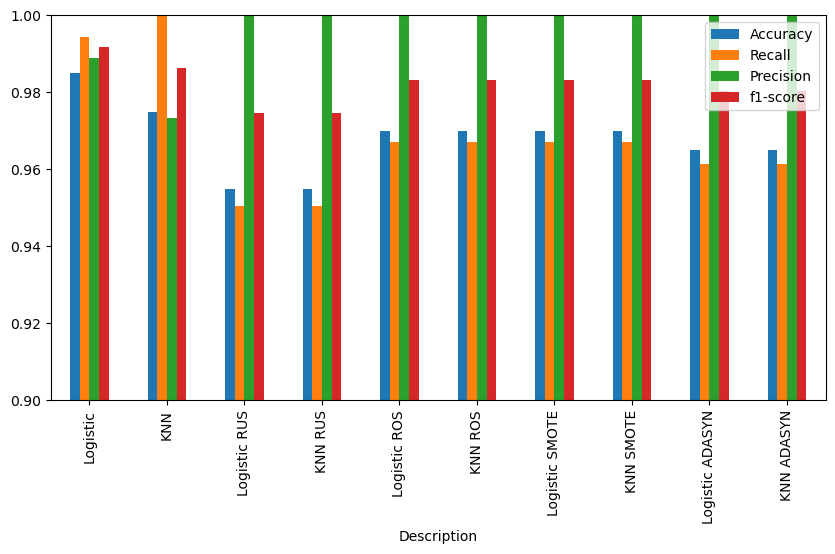

In [318]:
results.plot(x='Description', y=['Accuracy', 'Recall', 'Precision', 'f1-score'], kind='bar', figsize=(10, 5), ylim=(.9, 1.0))

## Conclusion

We have explored different techniques for dealing with imbalanced class distributions in a dataset, and tested two machine learning algorithms (Logistic Regression and K-Nearest Neighbors) in conjunction with these techniques. Below is a summarization of the different methodologies we've employed, coupled with the metrics you provided (Accuracy, Recall, Precision, f1-score).

### Key Metrics
The performance of each algorithm under each sampling technique was evaluated using the following metrics:

* Accuracy: Indicates the overall correctness of the model.
* Recall: Highlights the model's ability to identify all relevant instances.
* Precision: Shows the model's ability to not label a negative sample as positive.
* F1-Score: The harmonic mean between precision and recall.


### Observations

#### No Rebalancing:

* Logistic Regression and KNN both performed admirably across all metrics, although there may be a majority class bias.
  * Logistic: Accuracy=98.5%, Recall=99.45%, Precision=98.9%, F1=99.17%
  * KNN: Accuracy=97.5%, Recall=100%, Precision=97.3%, F1=98.64%


#### Random Undersampling (RUS):

* Both algorithms saw a decrease in accuracy and recall but maintained perfect precision.
  * Logistic: Accuracy=95.5%, Recall=95.05%, Precision=100%, F1=97.46%
  * KNN: Accuracy=95.5%, Recall=95.05%, Precision=100%, F1=97.46%


#### Random Oversampling (ROS):

* Both algorithms maintained high performance but with a slight reduction in accuracy and recall compared to the no-rebalancing scenario.
  * Logistic: Accuracy=97%, Recall=96.7%, Precision=100%, F1=98.32%
  * KNN: Accuracy=97%, Recall=96.7%, Precision=100%, F1=98.32%


#### SMOTE:

* Both algorithms performed almost identically to ROS.
  * Logistic: Accuracy=97%, Recall=96.7%, Precision=100%, F1=98.32%
  * KNN: Accuracy=97%, Recall=96.7%, Precision=100%, F1=98.32%


#### ADASYN:

* Slightly lower performance metrics compared to ROS and SMOTE for both algorithms.
  * Logistic: Accuracy=96.5%, Recall=96.15%, Precision=100%, F1=98.03%
  * KNN: Accuracy=96.5%, Recall=96.15%, Precision=100%, F1=98.03%


#### Conclusions:

* No Rebalancing: 
  * Highest performance but may have a majority class bias.
* Random Undersampling (RUS): 
  * A bit lower in performance but with perfect precision. Suitable when computational resources are limited.
* Random Oversampling (ROS) & SMOTE: 
  * High performance across metrics but a slight reduction compared to the no-rebalancing model.
* ADASYN: 
  * A marginal decrease in performance metrics compared to ROS and SMOTE, but still maintains a perfect precision score.

### References

* SMOTE: https://arxiv.org/pdf/1106.1813.pdf
* ADASYN: https://ieeexplore.ieee.org/document/4633969
